# Data preprocessing

## Imports

In [10]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data import

In [12]:
deliveries = pd.read_json("../data/raw/second/deliveries.jsonl", lines=True)
products = pd.read_json("../data/raw/second/products.jsonl", lines=True)
sessions = pd.read_json("../data/raw/second/sessions.jsonl", lines=True)
users = pd.read_json("../data/raw/second/users.jsonl", lines=True)

In [13]:
buy_sessions = sessions.loc[sessions['event_type'] == 'BUY_PRODUCT'].copy()
buy_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
132,126,2019-12-30 14:25:31,114,1005,BUY_PRODUCT,5,20001.0
167,130,2019-12-30 17:35:47,126,1076,BUY_PRODUCT,10,20002.0
182,131,2019-12-31 15:14:01,127,1005,BUY_PRODUCT,20,20003.0
202,133,2019-12-31 14:20:20,135,1030,BUY_PRODUCT,15,20004.0
204,134,2019-12-31 04:02:00,139,1084,BUY_PRODUCT,20,20005.0
...,...,...,...,...,...,...,...
787104,43957,2021-01-01 16:44:14,376,1284,BUY_PRODUCT,20,36052.0
787183,43963,2021-01-03 17:25:05,390,1042,BUY_PRODUCT,15,36053.0
787199,43964,2021-01-01 15:28:42,390,1017,BUY_PRODUCT,15,36054.0
787201,43965,2021-01-01 02:35:51,392,1077,BUY_PRODUCT,0,36055.0


## Data Cleaning

In [14]:
buy_sessions.loc[:, 'purchase_id'] = buy_sessions.loc[:, 'purchase_id'].astype(int)

In [15]:
buy_sessions.loc[:, 'week'] = buy_sessions['timestamp'].dropna().dt.isocalendar().week

In [16]:
buy_sessions.loc[:, 'year'] = buy_sessions['timestamp'].dropna().dt.year

In [17]:
def make_year_week(row):
    month = row['timestamp'].month
    year = row['year']
    week = row['week']
    if week == 1 and month == 12:
        year += 1
    if week > 50 and month == 1:
        year -= 1
    
    year = str(year)
    week = str(week)
    if len(week) == 1:
        week = '0' + week
    return year + '_' + week

In [18]:
buy_sessions.loc[:, 'year_week'] = buy_sessions.apply(make_year_week, axis=1)

In [19]:
buy_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,week,year,year_week
132,126,2019-12-30 14:25:31,114,1005,BUY_PRODUCT,5,20001,1,2019,2020_01
167,130,2019-12-30 17:35:47,126,1076,BUY_PRODUCT,10,20002,1,2019,2020_01
182,131,2019-12-31 15:14:01,127,1005,BUY_PRODUCT,20,20003,1,2019,2020_01
202,133,2019-12-31 14:20:20,135,1030,BUY_PRODUCT,15,20004,1,2019,2020_01
204,134,2019-12-31 04:02:00,139,1084,BUY_PRODUCT,20,20005,1,2019,2020_01
...,...,...,...,...,...,...,...,...,...,...
787104,43957,2021-01-01 16:44:14,376,1284,BUY_PRODUCT,20,36052,53,2021,2020_53
787183,43963,2021-01-03 17:25:05,390,1042,BUY_PRODUCT,15,36053,53,2021,2020_53
787199,43964,2021-01-01 15:28:42,390,1017,BUY_PRODUCT,15,36054,53,2021,2020_53
787201,43965,2021-01-01 02:35:51,392,1077,BUY_PRODUCT,0,36055,53,2021,2020_53


In [20]:
buy_sessions.drop(columns=['user_id', 'event_type', 'offered_discount', 'session_id', 'week', 'year', 'timestamp'], inplace=True)

In [21]:
# results_dir = '../data/interim/'
# buy_sessions.to_csv(results_dir + 'csv/buy_sessions_cleaned.csv', index=False)
# buy_sessions.to_pickle(results_dir + 'pickles/buy_sessions_cleaned.pickle')

In [22]:
buy_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16056 entries, 132 to 787205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   16056 non-null  int64 
 1   purchase_id  16056 non-null  int64 
 2   year_week    16056 non-null  object
dtypes: int64(2), object(1)
memory usage: 501.8+ KB


In [23]:
buy_sessions

,product_id,purchase_id,year_week
132,1005,20001,2020_01
167,1076,20002,2020_01
182,1005,20003,2020_01
202,1030,20004,2020_01
204,1084,20005,2020_01
...,...,...,...
787104,1284,36052,2020_53
787183,1042,36053,2020_53
787199,1017,36054,2020_53
787201,1077,36055,2020_53


## Calculate how many items of each product were sold each week

Create dataframe with unique products in columns and unique weeks in rows, so that each value will mean how many items of each product were sold each week

In [24]:
products_per_week = buy_sessions.groupby(by=['year_week', 'product_id']).count().rename(columns={'purchase_id': 'products_per_week'}).reset_index()

In [25]:
results_dir = '../data/processed/'
products_per_week.to_csv(results_dir + 'csv/products_per_week.csv', index=False)
products_per_week.to_pickle(results_dir + 'pickles/products_per_week.pickle')

In [26]:
products_per_week

,year_week,product_id,products_per_week
0,2019_31,1002,3
1,2019_31,1006,1
2,2019_31,1007,18
3,2019_31,1012,1
4,2019_31,1017,1
...,...,...,...
4558,2021_51,1032,1
4559,2021_51,1042,1
4560,2021_51,1075,1
4561,2021_51,1079,4


## Create line chart spanning entire history of product sells

In [27]:
# Get a list of all products, which appear in buy_sessions, sorted by number of sells
# unique_products = products_per_week['product_id'].unique()
# unique_products.shape[0]
unique_products = products_per_week['product_id'].value_counts().to_frame().index.to_list()
len(unique_products)

197

In [28]:
# for prod_id in unique_products:
#     products_per_week.loc[products_per_week['product_id'] == prod_id].plot.line(x='year_week', y='products_per_week', title=f'plot for {prod_id}', figsize=(15,9))
#     plt.show()

<AxesSubplot:title={'center':'plot for 1080'}, xlabel='year_week'>

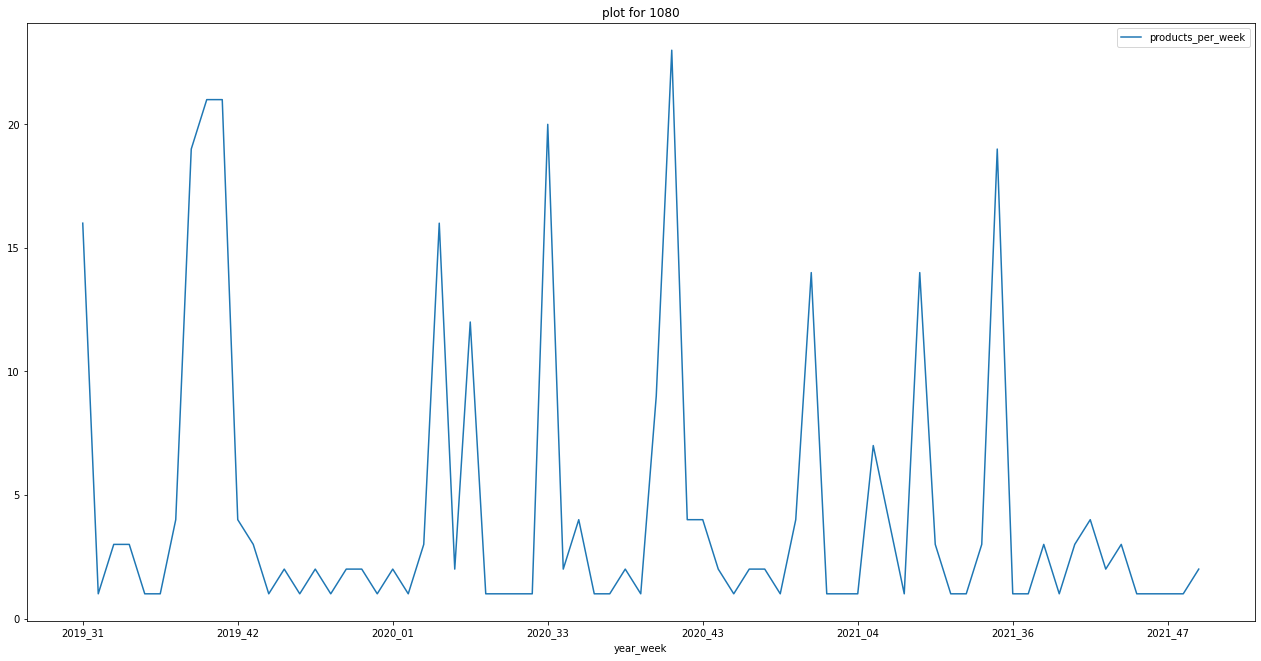

In [29]:
prod_id = unique_products[0]
prod_id = 1080
products_per_week.loc[products_per_week['product_id'] == prod_id].drop(columns='product_id').plot.line(x='year_week', y='products_per_week', title=f'plot for {prod_id}', figsize=(22,11))